# General

In [ ]:
import pandas as pd
import os
import glob
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Zona**
No nosso modelo considerámos 8 zonas do campo de acordo com a seguinte imagem.

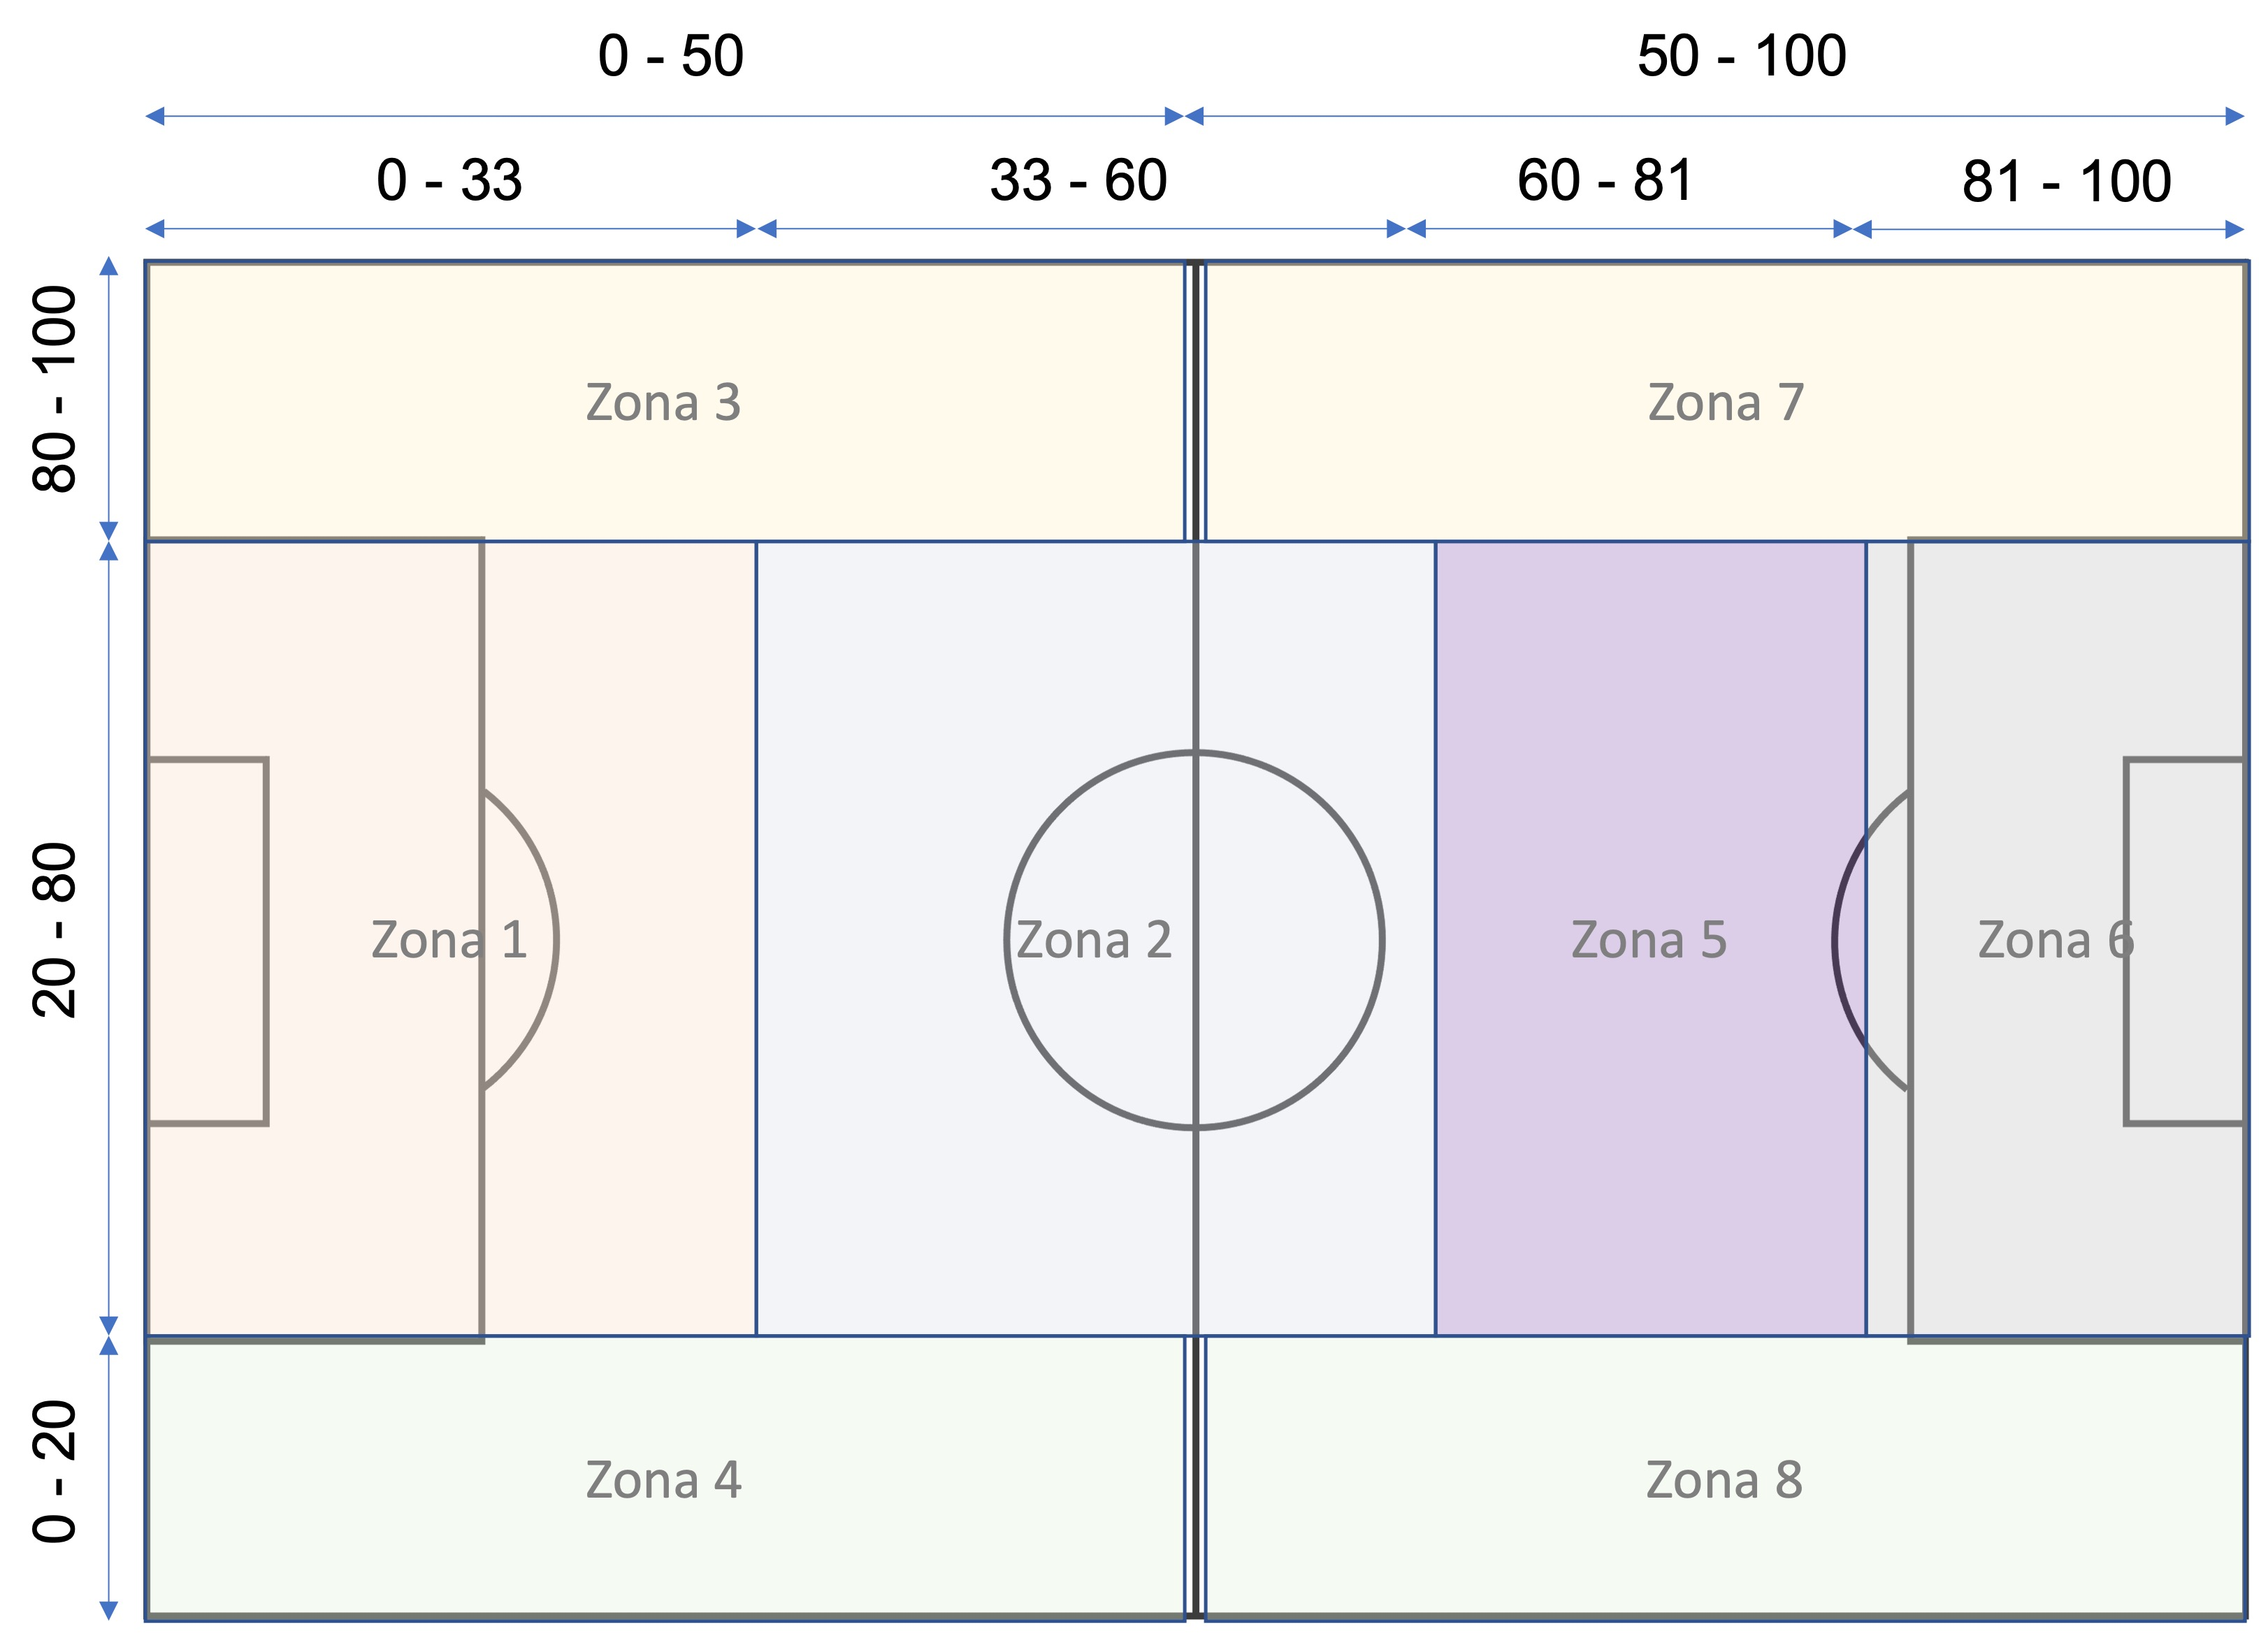

Vamos então no código definir as 8 zonas do campo e de seguida adicionar ao Dataframe todas as ligas a que tivemos acesso, adicionando também as colunas zona.

Cada métrica que considerámos para o modelo vai ser avaliada discretizada para cada zona, uma vez que os comportamentos e métricas variam muito de zona para zona do campo.

O nosso modelo vai ter em conta também os percentis das métricas de cada equipa em cada zona do campo.

In [ ]:
path = '/content/drive/MyDrive/TFM/Datasets/'
os.chdir(path)
files = glob.glob('*.{}'.format('csv'))
df = pd.DataFrame()

for f in files:
    df_1 = pd.read_csv(path + f, index_col=0)
    # O código abaixo insere uma coluna com as zonas de cada ação

    conditions = [
        (df_1['location.x'] < 33) & (df_1['location.y'].between(20, 80, inclusive=True)),
        (df_1['location.x'] >= 33) & (df_1['location.x']< 60) & (df_1['location.y'].between(20, 80, inclusive=True)),
        (df_1['location.x'] < 50) & (df_1['location.y'] > 80),
        (df_1['location.x'] < 50) & (df_1['location.y'] < 20),
        (df_1['location.x'] >= 60) & (df_1['location.x']< 81) & (df_1['location.y'].between(20, 80, inclusive=True)),
        (df_1['location.x'] >= 81) & (df_1['location.y'].between(20, 80, inclusive=True)),
        (df_1['location.x'] >= 50) & (df_1['location.y'] > 80),
        (df_1['location.x'] >= 50) & (df_1['location.y'] < 20)
     ]

    values = ['zona 1', 'zona 2', 'zona 3', 'zona 4', 'zona 5', 'zona 6', 'zona 7', 'zona 8']

    df_1['zona'] = np.select(conditions, values)

    if df.empty:
        df = df_1
    else:
        df = df.append(df_1, ignore_index=True)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  app.launch_new_instance()


,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type.primary,type.secondary,...,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,seasonId,date,gamestate,zona
0,981542258,5240887,1H,4,59,00:04:59.251,500.251444,981543331,duel,"['aerial_duel', 'recovery']",...,R. Kolo Muani,CF,187,True,190,981542259,187374,2021-8-6,0,zona 1
1,981542259,5240887,1H,4,59,00:04:59.251,500.251444,981543331,duel,"['aerial_duel', 'loss']",...,A. Disasi,RCB,190,False,187,981542258,187374,2021-8-6,0,zona 5
2,981542260,5240887,1H,30,55,00:30:55.489,2056.489238,981543264,duel,['aerial_duel'],...,Fábio,LB,172,True,179,981542265,187374,2021-8-6,1,zona 6
3,981542261,5240887,1H,34,7,00:34:07.427,2248.427261,981543710,duel,['aerial_duel'],...,R. Kolo Muani,CF,187,False,172,981542267,187374,2021-8-6,1,zona 3
4,981542262,5240887,1H,39,5,00:39:05.708,2546.708081,981543758,duel,"['aerial_duel', 'recovery']",...,R. Kolo Muani,CF,187,True,194,981542271,187374,2021-8-6,1,zona 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112015,1294221735,5251287,2H,61,0,01:01:00.794,3892.794269,1294217877,duel,['loose_ball_duel'],...,0,0,0,0,0,0,187528,2022-05-22,0,zona 6
3112016,1294221736,5251287,2H,63,26,01:03:26.212,4038.212784,1294219233,duel,['aerial_duel'],...,M. Lovato,CB,188,False,0,1294219231,187528,2022-05-22,0,zona 1
3112017,1294221739,5251287,2H,71,3,01:11:03.609,4495.609609,1294218075,duel,['loose_ball_duel'],...,0,0,0,0,0,0,187528,2022-05-22,0,zona 1
3112018,1294221741,5251287,2H,79,50,01:19:50.050,5022.050552,1294219494,duel,['loose_ball_duel'],...,0,0,0,0,0,0,187528,2022-05-22,0,zona 5


Após definidas as zonas do campo, vamos então captar os dados das métricas a considerar no nosso modelo.   

# Progression
Definimos **Progression** como sendo a soma da **progressão do transporte** ('carry progression') com **'progressão de passe'** normalizada com a soma dos módulos das variáveis anteriores.

Esta normalização deve-se ao facto de tanto o transporte de bola com a progressão de passe poderem assumir valores negativos.


In [ ]:
# Cálculo de métricas associadas à progressão do transporte

# Cálculo da soma de 'carry progression' por zona e equipa
df_carry = df[['team.id', 'team.name', 'carry.progression', 'zona']].groupby(['team.id', 'team.name', 'zona'] ).sum()
# Cálculo da soma do módulo da 'carry progression' por zona e equipa para depois podermos normalizar
df_total_carry = df[['team.id', 'team.name', 'zona', 'carry.progression']].groupby(['team.id', 'team.name', 'zona']).apply(lambda c: c.abs().sum())

df_total_carry = df_total_carry.rename({'carry.progression': 'total.progression'}, axis=1)
df_carry_div = df_carry.join(df_total_carry)
    
# Cálculo de métricas associadas à progressão do passe

df_pass = df[df['type.primary']=='pass'][['team.id', 'team.name', 'type.primary', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y', 'zona']]
# Cálculo do progressão de passe em termos de eixo de abcissas  
df_pass['prog_distance'] = df_pass['pass.endLocation.x'] - df_pass['location.x']
# A coluna calculada pode assumir valores negativos (quando há passes para "trás")
# Então vamos calcular o módulo destas progressões para depois podermos normalizar variáveis
df_pass['abs_distance'] = abs(df_pass['pass.endLocation.x'] - df_pass['location.x'])
    
# Conversão para metros
df_pass['prog_distance_metros'] = (df_pass['prog_distance']/100)*105
df_pass['tot_x_distance_metros'] = (df_pass['abs_distance']/100)*105
    
df_pass_grp = df_pass[['team.id', 'team.name', 'prog_distance_metros', 'tot_x_distance_metros', 'zona']].groupby(['team.id', 'team.name', 'zona'] ).sum()
df_prog_final = df_carry_div.join(df_pass_grp)

# Cálculo da progression sem normalização
df_prog_final['prog'] = df_prog_final['carry.progression'] + df_prog_final['prog_distance_metros']
# Cálculo da váriavel para normalizar a progression
df_prog_final['total'] = df_prog_final['total.progression'] + df_prog_final['tot_x_distance_metros']

df_prog_final = df_prog_final.drop(['carry.progression', 'total.progression', 'prog_distance_metros', 'tot_x_distance_metros'], axis=1)

# Cálculo da Progression normalizada
df_prog_final['prog_div'] = df_prog_final['prog']/df_prog_final['total']

df_prog_final = df_prog_final.drop(['prog', 'total'], axis=1)    

df_prog_final_grp = df_prog_final.unstack(2)
df_prog_final_grp.columns = df_prog_final_grp.columns.droplevel()
    
df_final = df_prog_final_grp.reset_index()

df_final = df_final.fillna(0)
    
# Cálculo do percentil da Progression para cada zona
for c in df_final.loc[:, df_final.columns.str.contains("zona")].columns:
    name = c + " Pct"
    df_final[name] = df_final[c].rank(pct = True)
        
df_progression = df_final.loc[:, df_final.columns.str.contains(r'Pct|team')]

col_prog = {
    'zona 1 Pct': 'Prg zona 1 Pct',
    'zona 2 Pct': 'Prg zona 2 Pct',
    'zona 3 Pct': 'Prg zona 3 Pct',
    'zona 4 Pct': 'Prg zona 4 Pct',
    'zona 5 Pct': 'Prg zona 5 Pct',
    'zona 6 Pct': 'Prg zona 6 Pct',
    'zona 7 Pct': 'Prg zona 7 Pct',
    'zona 8 Pct': 'Prg zona 8 Pct'
}

df_progression = df_progression.rename(columns=col_prog)

df_progression

zona,team.id,team.name,Prg zona 1 Pct,Prg zona 2 Pct,Prg zona 3 Pct,Prg zona 4 Pct,Prg zona 5 Pct,Prg zona 6 Pct,Prg zona 7 Pct,Prg zona 8 Pct
0,674,Valencia,0.969388,1.000000,1.000000,1.000000,0.846939,0.836735,0.775510,0.510204
1,675,Real Madrid,0.204082,0.969388,0.234694,0.316327,0.744898,0.520408,0.071429,0.734694
2,676,Barcelona,0.051020,0.959184,0.132653,0.051020,0.469388,0.214286,0.275510,0.081633
3,678,Athletic Bilbao,0.938776,0.979592,0.989796,0.938776,1.000000,0.622449,0.816327,0.857143
4,679,Atlético Madrid,0.673469,0.693878,0.163265,0.265306,0.826531,0.448980,0.714286,0.785714
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.275510,0.071429,0.193878,0.193878,0.234694,0.336735,0.326531,0.836735
94,3799,Angers SCO,0.632653,0.510204,0.551020,0.438776,0.295918,0.142857,0.163265,0.122449
95,3802,Reims,0.530612,0.551020,0.571429,0.418367,0.255102,0.173469,0.602041,0.704082
96,3803,Brest,0.887755,0.724490,0.673469,0.642857,0.571429,0.051020,0.846939,0.683673


A partir daqui a captação dos dados das métricas foi um pouco análoga.

# **Counterpressing per Opponents Recovery**
A métrica calculada aqui é nº de ações de *counterpressing* normalizada pelas recuperações do adversário.
Considerámos as interseções, duelos e *clearances* ações de *counterpressing recovery* e mais uma vez agrupámos por equipa e zona do campo.

In [ ]:
df_counterpressing = df[df['type.secondary'].str.contains('counterpressing_recovery')]
df_counterpressing = df_counterpressing[(df_counterpressing["type.primary"]== "duel")|(df_counterpressing["type.primary"]== "interception")|(df_counterpressing["type.primary"]== "clearance")]
# Cálculo de ações de counterpressing
df_counterpressing = df_counterpressing[['team.id', 'team.name', 'type.primary', 'zona']].groupby(['team.id', 'team.name', 'zona'] ).count()

df_counterpressing = df_counterpressing.rename({'type.primary': 'counter_pressing'}, axis=1)

### type.secondary = recovery --> Counterpressing per Opponents Recovery

df_opp_recovery = df[df['type.secondary'].str.contains('recovery')]
df_opp_recovery = df_opp_recovery[(df_opp_recovery["type.primary"]== "duel")|(df_opp_recovery["type.primary"]== "interception")|(df_opp_recovery["type.primary"]== "clearance")]
# Cálculo das recuperações do adversário
df_opp_recovery = df_opp_recovery[['opponentTeam.id', 'opponentTeam.name', 'zona', 'type.primary']].groupby(['opponentTeam.id', 'opponentTeam.name', 'zona'] ).count()

df_opp_recovery = df_opp_recovery.rename({'type.primary': 'opp_recoveries'}, axis=1)

df_opp_recovery = df_opp_recovery.rename_axis(('team.id', 'team.name', 'zona'))

df_cp_final = df_counterpressing.join(df_opp_recovery)
# Cálculo da métrica com a normalização das recuperações do adversário
df_cp_final['CP per opp recoveries'] = df_cp_final['counter_pressing']/df_cp_final['opp_recoveries']
df_cp_final = df_cp_final.drop(['counter_pressing', 'opp_recoveries'], axis=1)

df_cp_final = df_cp_final.unstack(2)
df_cp_final.columns = df_cp_final.columns.droplevel()

df_cp_final = df_cp_final.fillna(0)

# Cálculo do percentil da Counterpressing per Opponents Recovery para cada zona
for c in df_cp_final.columns:
    name = c + " Pct"
    df_cp_final[name] = df_cp_final[c].rank(pct = True)

df_cp_final = df_cp_final.loc[:, df_cp_final.columns.str.contains(r'Pct|team')]

col_cp = {
    'zona 1 Pct': 'CP zona 1 Pct',
    'zona 2 Pct': 'CP zona 2 Pct',
    'zona 3 Pct': 'CP zona 3 Pct',
    'zona 4 Pct': 'CP zona 4 Pct',
    'zona 5 Pct': 'CP zona 5 Pct',
    'zona 6 Pct': 'CP zona 6 Pct',
    'zona 7 Pct': 'CP zona 7 Pct',
    'zona 8 Pct': 'CP zona 8 Pct'
}

df_cp_final = df_cp_final.rename(columns=col_cp)
df_cp_final = df_cp_final.reset_index()

df_cp_final

zona,team.id,team.name,CP zona 1 Pct,CP zona 2 Pct,CP zona 3 Pct,CP zona 4 Pct,CP zona 5 Pct,CP zona 6 Pct,CP zona 7 Pct,CP zona 8 Pct
0,674,Valencia,0.418367,0.785714,0.306122,0.561224,0.913265,0.520408,0.801020,0.877551
1,675,Real Madrid,0.377551,0.989796,0.551020,0.734694,0.591837,0.632653,0.346939,0.377551
2,676,Barcelona,0.153061,0.979592,0.367347,0.959184,0.724490,0.959184,0.306122,0.989796
3,678,Athletic Bilbao,0.193878,0.846939,0.908163,0.255102,0.663265,0.183673,0.989796,0.663265
4,679,Atlético Madrid,0.275510,0.551020,0.663265,0.234694,0.612245,0.602041,0.948980,0.469388
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.244898,0.418367,0.500000,0.372449,0.132653,0.290816,0.290816,0.306122
94,3799,Angers SCO,0.224490,0.071429,0.295918,0.030612,0.020408,0.693878,0.204082,0.051020
95,3802,Reims,0.816327,0.244898,0.071429,0.622449,0.265306,0.091837,0.040816,0.714286
96,3803,Brest,0.561224,0.122449,0.030612,0.265306,0.408163,0.030612,0.275510,0.367347


#Possession
A nossa métrica de **Possession** (nº posses * duração média de cada posses) está relacionada com o nº e duração média das posses em cada zona , normalizada com os dados do adversário, pois a duração e nº de posses de bola está também sempre dependente da posse do adversário.

In [ ]:
# Cálculo do nº de posses (contagem dos id's únicos das posses) de cada equipa e por zona
df_possession = df[['team.id', 'team.name', 'possession.id', 'zona']].groupby(['team.id', 'team.name', 'zona'] ).nunique()
# Cálculo da duração média das posses de bola agrupada por equipa e zona do campo
df_possession_duration = df[['team.id', 'team.name', 'possession.duration', 'zona']].groupby(['team.id', 'team.name', 'zona'] ).mean()

df_p = df_possession.join(df_possession_duration)
# Cálculo do nº posses * duração média de cada passe
df_p['possession_metric'] = df_p['possession.id'] * df_p['possession.duration']
df_p = df_p.drop(['possession.id', 'possession.duration'], axis=1)

# Cálculos análogos mas sobre os adversários
df_opp_possession = df[['opponentTeam.id', 'opponentTeam.name', 'possession.id', 'zona']].groupby(['opponentTeam.id', 'opponentTeam.name', 'zona'] ).nunique()
df_opp_possession_duration = df[['opponentTeam.id', 'opponentTeam.name', 'possession.duration', 'zona']].groupby(['opponentTeam.id', 'opponentTeam.name', 'zona'] ).mean()

df_op = df_opp_possession.join(df_opp_possession_duration)
df_op['opp_possession_metric'] = df_op['possession.id'] * df_op['possession.duration']
df_op = df_op.drop(['possession.id', 'possession.duration'], axis=1)

df_op = df_op.rename_axis(('team.id', 'team.name', 'zona'))

df_p_final = df_p.join(df_op)

# Cálculo da nossa métrica de Possession 
df_p_final['possession'] = df_p_final['possession_metric']/df_p_final['opp_possession_metric']
df_p_final = df_p_final.drop(['possession_metric', 'opp_possession_metric'], axis=1)

df_p_final = df_p_final.unstack(2)
df_p_final.columns = df_p_final.columns.droplevel()

df_p_final = df_p_final.fillna(0)

# Cálculo do percentil da Possession para cada zona
for c in df_p_final.columns:
    name = c + " Pct"
    df_p_final[name] = df_p_final[c].rank(pct = True)

df_p_final = df_p_final.loc[:, df_p_final.columns.str.contains(r'Pct|team')]

col_poss = {
    'zona 1 Pct': 'poss zona 1 Pct',
    'zona 2 Pct': 'poss zona 2 Pct',
    'zona 3 Pct': 'poss zona 3 Pct',
    'zona 4 Pct': 'poss zona 4 Pct',
    'zona 5 Pct': 'poss zona 5 Pct',
    'zona 6 Pct': 'poss zona 6 Pct',
    'zona 7 Pct': 'poss zona 7 Pct',
    'zona 8 Pct': 'poss zona 8 Pct'
}

df_p_final = df_p_final.rename(columns=col_poss)
df_p_final = df_p_final.reset_index()

df_p_final

zona,team.id,team.name,poss zona 1 Pct,poss zona 2 Pct,poss zona 3 Pct,poss zona 4 Pct,poss zona 5 Pct,poss zona 6 Pct,poss zona 7 Pct,poss zona 8 Pct
0,674,Valencia,0.081633,0.214286,0.183673,0.102041,0.428571,0.459184,0.367347,0.346939
1,675,Real Madrid,0.795918,0.877551,0.806122,0.918367,0.908163,0.928571,0.877551,0.908163
2,676,Barcelona,0.581633,0.969388,0.632653,0.867347,0.969388,0.979592,0.969388,0.989796
3,678,Athletic Bilbao,0.040816,0.479592,0.285714,0.030612,0.561224,0.540816,0.571429,0.357143
4,679,Atlético Madrid,0.122449,0.418367,0.540816,0.357143,0.591837,0.826531,0.510204,0.520408
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.642857,0.520408,0.581633,0.510204,0.387755,0.428571,0.540816,0.387755
94,3799,Angers SCO,0.704082,0.438776,0.887755,0.540816,0.469388,0.500000,0.397959,0.418367
95,3802,Reims,0.438776,0.132653,0.091837,0.377551,0.030612,0.244898,0.020408,0.071429
96,3803,Brest,0.132653,0.112245,0.112245,0.306122,0.285714,0.418367,0.316327,0.316327


#Shots, Crosses, Passes

Cálculo do nº de remates, cruzamentos e passes agrupado por equipa e zona.

In [ ]:
# Cálculo do nº remates de cada equipa para cada zona
df_shots = df[df['type.primary']=='shot'][['team.id', 'team.name', 'zona', 'type.primary']]\
.groupby(['team.id', 'team.name', 'zona']).count()

df_shots = df_shots.unstack(2)
df_shots.columns = df_shots.columns.droplevel()

df_shots = df_shots.fillna(0)

# Cálculo do percentil do nº remates de cada equipa para cada zona
for c in df_shots.columns:
    name = c + " Pct"
    df_shots[name] = df_shots[c].rank(pct = True)

df_shots = df_shots.loc[:, df_shots.columns.str.contains(r'Pct|team')]

col_shots = {
    'zona 1 Pct': 'shots zona 1 Pct',
    'zona 2 Pct': 'shots zona 2 Pct',
    'zona 3 Pct': 'shots zona 3 Pct',
    'zona 4 Pct': 'shots zona 4 Pct',
    'zona 5 Pct': 'shots zona 5 Pct',
    'zona 6 Pct': 'shots zona 6 Pct',
    'zona 7 Pct': 'shots zona 7 Pct',
    'zona 8 Pct': 'shots zona 8 Pct'
}

df_shots = df_shots.rename(columns=col_shots)
df_shots = df_shots.reset_index()

df_shots

zona,team.id,team.name,shots zona 1 Pct,shots zona 2 Pct,shots zona 3 Pct,shots zona 4 Pct,shots zona 5 Pct,shots zona 6 Pct,shots zona 7 Pct,shots zona 8 Pct
0,674,Valencia,0.494898,0.862245,0.469388,0.979592,0.525510,0.112245,0.229592,0.137755
1,675,Real Madrid,0.494898,0.744898,0.969388,0.479592,1.000000,0.938776,0.617347,0.484694
2,676,Barcelona,0.494898,0.204082,0.469388,0.479592,0.474490,0.877551,0.617347,0.484694
3,678,Athletic Bilbao,0.494898,0.540816,0.469388,0.479592,0.214286,0.739796,0.229592,0.484694
4,679,Atlético Madrid,0.494898,1.000000,0.969388,0.479592,0.306122,0.632653,0.229592,0.979592
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.494898,0.204082,0.469388,0.479592,0.505102,0.346939,0.617347,0.913265
94,3799,Angers SCO,0.494898,0.862245,0.469388,0.479592,0.260204,0.173469,0.943878,0.484694
95,3802,Reims,0.494898,0.862245,0.469388,0.479592,0.387755,0.224490,0.943878,0.979592
96,3803,Brest,0.494898,0.744898,0.469388,0.479592,0.147959,0.311224,0.617347,0.484694


In [ ]:
df_crosses = df[df['type.secondary'].str.contains('cross')]
# # Cálculo do nº cruzamentos de cada equipa para cada zona
df_crosses = df_crosses[df_crosses["type.primary"]== "pass"]
df_crosses = df_crosses[['team.id', 'team.name', 'type.primary', 'zona']].groupby(['team.id', 'team.name', 'zona']).count()

df_crosses = df_crosses.unstack(2)
df_crosses.columns = df_crosses.columns.droplevel()

df_crosses = df_crosses.fillna(0)

# Cálculo do percentil do nº cruzamentos de cada equipa para cada zona
for c in df_crosses.columns:
    name = c + " Pct"
    df_crosses[name] = df_crosses[c].rank(pct = True)

df_crosses = df_crosses.loc[:, df_crosses.columns.str.contains(r'Pct|team')]

col_crosses = {
    'zona 1 Pct': 'cross zona 1 Pct',
    'zona 2 Pct': 'cross zona 2 Pct',
    'zona 3 Pct': 'cross zona 3 Pct',
    'zona 4 Pct': 'cross zona 4 Pct',
    'zona 5 Pct': 'cross zona 5 Pct',
    'zona 6 Pct': 'cross zona 6 Pct',
    'zona 7 Pct': 'cross zona 7 Pct',
    'zona 8 Pct': 'cross zona 8 Pct'
}

df_crosses = df_crosses.rename(columns=col_crosses)
df_crosses = df_crosses.reset_index()

df_crosses


zona,team.id,team.name,cross zona 2 Pct,cross zona 5 Pct,cross zona 6 Pct,cross zona 7 Pct,cross zona 8 Pct
0,674,Valencia,0.443878,0.382653,0.204082,0.908163,0.816327
1,675,Real Madrid,0.443878,0.933673,0.928571,0.346939,0.255102
2,676,Barcelona,0.443878,0.979592,0.969388,0.928571,0.668367
3,678,Athletic Bilbao,0.443878,0.948980,0.500000,0.979592,0.775510
4,679,Atlético Madrid,0.443878,0.443878,0.719388,0.765306,0.352041
...,...,...,...,...,...,...,...
93,3797,Clermont,0.443878,0.484694,0.362245,0.765306,0.632653
94,3799,Angers SCO,0.443878,0.408163,0.224490,0.285714,0.275510
95,3802,Reims,0.443878,0.336735,0.142857,0.413265,0.653061
96,3803,Brest,0.443878,0.637755,0.515306,0.806122,0.525510


#Duelos por ação do adversário

In [ ]:
# Cálculo nº passes de cada equipa para cada zona
df_pass = df[df['type.primary']=='pass'][['team.id', 'team.name', 'zona', 'type.primary']]\
.groupby(['team.id', 'team.name', 'zona']).count()

df_pass = df_pass.unstack(2)
df_pass.columns = df_pass.columns.droplevel()

df_pass = df_pass.fillna(0)

# Cálculo do percentil do nº passes de cada equipa para cada zona
for c in df_pass.columns:
    name = c + " Pct"
    df_pass[name] = df_pass[c].rank(pct = True)

df_pass = df_pass.loc[:, df_pass.columns.str.contains(r'Pct|team')]

col_pass = {
    'zona 1 Pct': 'pass zona 1 Pct',
    'zona 2 Pct': 'pass zona 2 Pct',
    'zona 3 Pct': 'pass zona 3 Pct',
    'zona 4 Pct': 'pass zona 4 Pct',
    'zona 5 Pct': 'pass zona 5 Pct',
    'zona 6 Pct': 'pass zona 6 Pct',
    'zona 7 Pct': 'pass zona 7 Pct',
    'zona 8 Pct': 'pass zona 8 Pct'
}

df_pass = df_pass.rename(columns=col_pass)
df_pass = df_pass.reset_index()

df_pass

zona,team.id,team.name,pass zona 1 Pct,pass zona 2 Pct,pass zona 3 Pct,pass zona 4 Pct,pass zona 5 Pct,pass zona 6 Pct,pass zona 7 Pct,pass zona 8 Pct
0,674,Valencia,0.020408,0.020408,0.010204,0.010204,0.306122,0.265306,0.244898,0.316327
1,675,Real Madrid,0.928571,0.867347,0.750000,0.887755,0.969388,0.989796,0.928571,0.979592
2,676,Barcelona,0.765306,0.969388,0.336735,0.846939,0.959184,0.938776,0.857143,0.989796
3,678,Athletic Bilbao,0.122449,0.428571,0.418367,0.153061,0.653061,0.551020,0.765306,0.489796
4,679,Atlético Madrid,0.367347,0.602041,0.750000,0.571429,0.663265,0.744898,0.836735,0.693878
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.826531,0.744898,0.724490,0.969388,0.255102,0.280612,0.653061,0.459184
94,3799,Angers SCO,0.755102,0.663265,1.000000,0.612245,0.448980,0.071429,0.520408,0.387755
95,3802,Reims,0.510204,0.285714,0.357143,0.520408,0.142857,0.102041,0.224490,0.265306
96,3803,Brest,0.173469,0.255102,0.474490,0.530612,0.295918,0.357143,0.693878,0.500000


Calculamos também o nº faltas, nº interseções e o nº duelos, normalizando-os pelo nº ações do adversário. Esta normalização é importante, uma vez que se o adversário não tiver muitas ações no jogo também não irão ser cometidas muitas faltas sobre ele, análogamente para o nº de interseções e duelos disputados.

In [ ]:
# Cálculo nº duelos de cada equipa para cada zona
df_duels = df[df['type.primary']=='duel'][['team.id', 'team.name', 'zona', 'type.primary']]\
.groupby(['team.id', 'team.name', 'zona']).count()

# Cálculo do nº ações do adversário (Remates, passes, carries)
df_opp_actions = df[(df['type.primary']=='shot')|(df['type.primary']=='pass')|(df['carry.progression']!=0)][['opponentTeam.id', 'opponentTeam.name', 'zona', 'type.primary']]\
.groupby(['opponentTeam.id', 'opponentTeam.name', 'zona']).count()

df_duels = df_duels.rename({'type.primary': 'duels'}, axis=1)
df_opp_actions = df_opp_actions.rename({'type.primary': 'opp actions'}, axis=1)

df_opp_actions = df_opp_actions.rename_axis(('team.id', 'team.name', 'zona'))

df_duels_final = df_duels.join(df_opp_actions)

# Cálculo do nº de duelos por ação do adversário
df_duels_final['duels per opp action'] = df_duels_final['duels']/df_duels_final['opp actions']
df_duels_final = df_duels_final.drop(['duels', 'opp actions'], axis=1)

df_duels_final = df_duels_final.unstack(2)
df_duels_final.columns = df_duels_final.columns.droplevel()

# Cálculo do percentil nº duelos por ação do adversário de cada equipa para cada zona
for c in df_duels_final.columns:
    name = c + " Pct"
    df_duels_final[name] = df_duels_final[c].rank(pct = True)

df_duels_final = df_duels_final.loc[:, df_duels_final.columns.str.contains(r'Pct|team')]

col_duels = {
    'zona 1 Pct': 'duels zona 1 Pct',
    'zona 2 Pct': 'duels zona 2 Pct',
    'zona 3 Pct': 'duels zona 3 Pct',
    'zona 4 Pct': 'duels zona 4 Pct',
    'zona 5 Pct': 'duels zona 5 Pct',
    'zona 6 Pct': 'duels zona 6 Pct',
    'zona 7 Pct': 'duels zona 7 Pct',
    'zona 8 Pct': 'duels zona 8 Pct'
}

df_duels_final = df_duels_final.rename(columns=col_duels)
df_duels_final = df_duels_final.reset_index()

df_duels_final

zona,team.id,team.name,duels zona 1 Pct,duels zona 2 Pct,duels zona 3 Pct,duels zona 4 Pct,duels zona 5 Pct,duels zona 6 Pct,duels zona 7 Pct,duels zona 8 Pct
0,674,Valencia,0.510204,0.704082,0.785714,0.724490,0.765306,0.571429,0.816327,0.673469
1,675,Real Madrid,0.653061,0.234694,0.734694,0.346939,0.214286,0.816327,0.163265,0.326531
2,676,Barcelona,0.224490,0.969388,0.581633,0.877551,0.959184,0.918367,0.948980,0.938776
3,678,Athletic Bilbao,0.193878,0.755102,0.224490,0.040816,0.683673,0.785714,0.683673,0.193878
4,679,Atlético Madrid,0.244898,0.326531,0.489796,0.510204,0.469388,0.979592,0.265306,0.295918
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.081633,0.102041,0.448980,0.142857,0.234694,0.408163,0.612245,0.377551
94,3799,Angers SCO,0.275510,0.214286,0.846939,0.377551,0.438776,0.653061,0.255102,0.173469
95,3802,Reims,0.530612,0.122449,0.193878,0.714286,0.040816,0.132653,0.010204,0.214286
96,3803,Brest,0.326531,0.010204,0.265306,0.336735,0.367347,0.295918,0.428571,0.653061


#Interceções por ação do adversário

In [ ]:
# Cálculo nº interseções de cada equipa para cada zona
df_interceptions = df[df['type.primary']=='interception'][['team.id', 'team.name', 'zona', 'type.primary']]\
.groupby(['team.id', 'team.name', 'zona']).count()

df_interceptions = df_interceptions.rename({'type.primary': 'interceptions'}, axis=1)

df_interceptions_final = df_interceptions.join(df_opp_actions)

# Cálculo do nº de interseções por ação do adversário
df_interceptions_final['interceptions per opp action'] = df_interceptions_final['interceptions']/df_interceptions_final['opp actions']
df_interceptions_final = df_interceptions_final.drop(['interceptions', 'opp actions'], axis=1)


df_interceptions_final = df_interceptions_final.unstack(2)
df_interceptions_final.columns = df_interceptions_final.columns.droplevel()

# Cálculo do percentil nº interseções por ação do adversário de cada equipa para cada zona
for c in df_interceptions_final.columns:
    name = c + " Pct"
    df_interceptions_final[name] = df_interceptions_final[c].rank(pct = True)

df_interceptions_final = df_interceptions_final.loc[:, df_interceptions_final.columns.str.contains(r'Pct|team')]

col_int = {
    'zona 1 Pct': 'interceptions zona 1 Pct',
    'zona 2 Pct': 'interceptions zona 2 Pct',
    'zona 3 Pct': 'interceptions zona 3 Pct',
    'zona 4 Pct': 'interceptions zona 4 Pct',
    'zona 5 Pct': 'interceptions zona 5 Pct',
    'zona 6 Pct': 'interceptions zona 6 Pct',
    'zona 7 Pct': 'interceptions zona 7 Pct',
    'zona 8 Pct': 'interceptions zona 8 Pct'
}

df_interceptions_final = df_interceptions_final.rename(columns=col_int)
df_interceptions_final = df_interceptions_final.reset_index()

df_interceptions_final

zona,team.id,team.name,interceptions zona 1 Pct,interceptions zona 2 Pct,interceptions zona 3 Pct,interceptions zona 4 Pct,interceptions zona 5 Pct,interceptions zona 6 Pct,interceptions zona 7 Pct,interceptions zona 8 Pct
0,674,Valencia,0.693878,0.622449,0.857143,0.591837,0.602041,0.663265,0.438776,0.244898
1,675,Real Madrid,0.714286,0.510204,0.928571,0.214286,0.704082,0.928571,0.336735,0.295918
2,676,Barcelona,0.102041,0.897959,0.306122,0.795918,0.969388,0.785714,0.938776,0.938776
3,678,Athletic Bilbao,0.428571,0.857143,0.397959,0.142857,0.683673,0.561224,0.785714,0.428571
4,679,Atlético Madrid,0.234694,0.540816,0.826531,0.510204,0.591837,0.795918,0.387755,0.387755
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.091837,0.163265,0.255102,0.061224,0.234694,0.846939,0.795918,0.336735
94,3799,Angers SCO,0.551020,0.214286,0.887755,0.846939,0.224490,0.214286,0.275510,0.265306
95,3802,Reims,0.591837,0.336735,0.142857,0.938776,0.153061,0.357143,0.214286,0.214286
96,3803,Brest,0.336735,0.020408,0.244898,0.428571,0.071429,0.091837,0.173469,0.163265


# Faltas por ação do adversário


In [ ]:
# Cálculo nº faltas de cada equipa para cada zona
df_fouls = df[(df['type.secondary'].str.contains('foul')) & (df['type.primary']=='infraction')][['team.id', 'team.name', 'zona', 'type.primary']]\
.groupby(['team.id', 'team.name', 'zona']).count()

df_fouls = df_fouls.rename({'type.primary': 'fouls'}, axis=1)

df_fouls_final = df_fouls.join(df_opp_actions)
# Cálculo do nº de faltas por ação do adversário
df_fouls_final['fouls per opp action'] = df_fouls_final['fouls']/df_fouls_final['opp actions']
df_fouls_final = df_fouls_final.drop(['fouls', 'opp actions'], axis=1)


df_fouls_final = df_fouls_final.unstack(2)
df_fouls_final.columns = df_fouls_final.columns.droplevel()

# Cálculo do percentil nº faltas por ação do adversário de cada equipa para cada zona
for c in df_fouls_final.columns:
    name = c + " Pct"
    df_fouls_final[name] = df_fouls_final[c].rank(pct = True)

df_fouls_final = df_fouls_final.loc[:, df_fouls_final.columns.str.contains(r'Pct|team')]

col_fouls = {
    'zona 1 Pct': 'fouls zona 1 Pct',
    'zona 2 Pct': 'fouls zona 2 Pct',
    'zona 3 Pct': 'fouls zona 3 Pct',
    'zona 4 Pct': 'fouls zona 4 Pct',
    'zona 5 Pct': 'fouls zona 5 Pct',
    'zona 6 Pct': 'fouls zona 6 Pct',
    'zona 7 Pct': 'fouls zona 7 Pct',
    'zona 8 Pct': 'fouls zona 8 Pct'
}

df_fouls_final = df_fouls_final.rename(columns=col_fouls)
df_fouls_final = df_fouls_final.reset_index()

df_fouls_final

zona,team.id,team.name,fouls zona 1 Pct,fouls zona 2 Pct,fouls zona 3 Pct,fouls zona 4 Pct,fouls zona 5 Pct,fouls zona 6 Pct,fouls zona 7 Pct,fouls zona 8 Pct
0,674,Valencia,0.704082,0.948980,0.969388,0.928571,0.938776,0.755102,0.979592,0.948980
1,675,Real Madrid,0.938776,0.204082,0.693878,0.397959,0.224490,0.785714,0.724490,0.102041
2,676,Barcelona,0.132653,0.969388,0.602041,0.887755,0.979592,0.928571,1.000000,1.000000
3,678,Athletic Bilbao,0.081633,0.714286,0.346939,0.056122,0.806122,0.806122,0.877551,0.479592
4,679,Atlético Madrid,0.561224,0.561224,0.785714,0.683673,0.673469,0.989796,0.311224,0.061224
...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.183673,0.040816,0.275510,0.377551,0.153061,0.510204,0.357143,0.387755
94,3799,Angers SCO,0.469388,0.112245,0.816327,0.693878,0.612245,0.438776,0.244898,0.336735
95,3802,Reims,0.724490,0.102041,0.224490,0.663265,0.132653,0.377551,0.132653,0.295918
96,3803,Brest,0.316327,0.020408,0.102041,0.479592,0.112245,0.561224,0.510204,0.275510


# KMeans para clustering de estilos de jogo

Vamos treinar um algoritmo de machine learning não supervisionado - KMeans.

O KMeans é capaz de encontrar relações nos dados e criar grupos de pontos semelhantes.

Com base nas métricas que considerámos para o modelo e nos seus respectivos percentis vamos tentar agrupar equipas com base em fatores de semelhança.

In [ ]:
from functools import reduce

# Adicionar num dataframe os dados relativos cálculados até aqui
data_frames = [df_progression, df_cp_final, df_p_final, df_shots, df_crosses, df_pass, df_duels_final, df_interceptions_final, df_fouls_final]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['team.id', 'team.name'],
                                            how='outer'), data_frames)
df_merged

zona,team.id,team.name,Prg zona 1 Pct,Prg zona 2 Pct,Prg zona 3 Pct,Prg zona 4 Pct,Prg zona 5 Pct,Prg zona 6 Pct,Prg zona 7 Pct,Prg zona 8 Pct,...,interceptions zona 7 Pct,interceptions zona 8 Pct,fouls zona 1 Pct,fouls zona 2 Pct,fouls zona 3 Pct,fouls zona 4 Pct,fouls zona 5 Pct,fouls zona 6 Pct,fouls zona 7 Pct,fouls zona 8 Pct
0,674,Valencia,0.969388,1.000000,1.000000,1.000000,0.846939,0.836735,0.775510,0.510204,...,0.438776,0.244898,0.704082,0.948980,0.969388,0.928571,0.938776,0.755102,0.979592,0.948980
1,675,Real Madrid,0.204082,0.969388,0.234694,0.316327,0.744898,0.520408,0.071429,0.734694,...,0.336735,0.295918,0.938776,0.204082,0.693878,0.397959,0.224490,0.785714,0.724490,0.102041
2,676,Barcelona,0.051020,0.959184,0.132653,0.051020,0.469388,0.214286,0.275510,0.081633,...,0.938776,0.938776,0.132653,0.969388,0.602041,0.887755,0.979592,0.928571,1.000000,1.000000
3,678,Athletic Bilbao,0.938776,0.979592,0.989796,0.938776,1.000000,0.622449,0.816327,0.857143,...,0.785714,0.428571,0.081633,0.714286,0.346939,0.056122,0.806122,0.806122,0.877551,0.479592
4,679,Atlético Madrid,0.673469,0.693878,0.163265,0.265306,0.826531,0.448980,0.714286,0.785714,...,0.387755,0.387755,0.561224,0.561224,0.785714,0.683673,0.673469,0.989796,0.311224,0.061224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3797,Clermont,0.275510,0.071429,0.193878,0.193878,0.234694,0.336735,0.326531,0.836735,...,0.795918,0.336735,0.183673,0.040816,0.275510,0.377551,0.153061,0.510204,0.357143,0.387755
94,3799,Angers SCO,0.632653,0.510204,0.551020,0.438776,0.295918,0.142857,0.163265,0.122449,...,0.275510,0.265306,0.469388,0.112245,0.816327,0.693878,0.612245,0.438776,0.244898,0.336735
95,3802,Reims,0.530612,0.551020,0.571429,0.418367,0.255102,0.173469,0.602041,0.704082,...,0.214286,0.214286,0.724490,0.102041,0.224490,0.663265,0.132653,0.377551,0.132653,0.295918
96,3803,Brest,0.887755,0.724490,0.673469,0.642857,0.571429,0.051020,0.846939,0.683673,...,0.173469,0.163265,0.316327,0.020408,0.102041,0.479592,0.112245,0.561224,0.510204,0.275510


Retirar identificadores de equipas e normalizar os nossos dados com Min Max


In [ ]:
from sklearn import preprocessing

teams_names = df_merged['team.name'].tolist() 

df_ml = df_merged.drop(['team.name', 'team.id'], axis = 1) 

x = df_ml.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

**PCA** 

Usamos o PCA aqui como forma de reduzir as nossas dimensões. 

Escolhemos ver os dados num plot 3D com os resultados do Kmeans.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
df1 = pd.DataFrame(pca.fit_transform(X_norm))
df1

,0,1,2
0,-0.656775,-1.455805,1.614703
1,1.317101,1.120845,-0.427506
2,2.622008,-0.285030,0.424598
3,0.221140,-1.649342,0.083672
4,0.411958,-0.260503,-0.151482
...,...,...,...
93,-0.048834,0.304314,-1.253806
94,-0.573180,0.959289,-0.505106
95,-1.865850,0.282413,-0.544431
96,-1.317919,-0.479681,-0.927542


Tendo reduzido as dimensões podemos fazer um plot das equipas e procurar relações entre elas.

O elbow method é usado para obter o melhor valor de clusters ($K$) para um KMeans.

Fizemos então um ciclo que vai treinar 14 modelos de KMeans (com $K$ diferentes) e retirar o WCSS para cada um dos treinos.

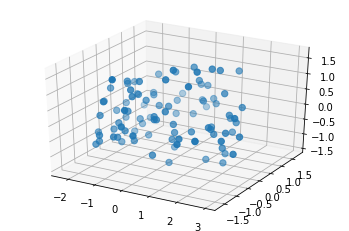

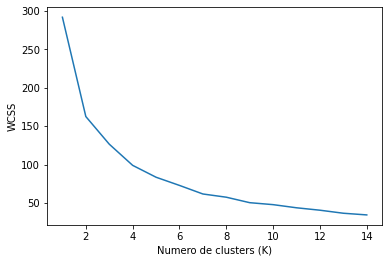

In [ ]:
import re, seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


%matplotlib inline
df1.columns = ['PC1','PC2', 'PC3']

ax = plt.figure().gca(projection='3d')

ax.scatter(df1['PC1'], df1['PC2'], df1['PC3'], s=40)

plt.show()

wcss = [] 
for i in range(1, 15): 
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df1) 
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.xlabel('Numero de clusters (K)')
plt.ylabel('WCSS') 
plt.show()

Consideramos $K=9$ (como cotovelo do nosso gráfico de WCSS), pois é talvez o valor de $K$ a partir do qual o WCSS deixa
de cair com tanta velocidade.

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans = kmeans.fit(df1)

labels = kmeans.predict(df1)
clusters = kmeans.labels_.tolist()

df1['cluster'] = clusters
df1['name'] = teams_names
df1.columns = ['x', 'y', 'z', 'cluster', 'team.name']
df1

,x,y,z,cluster,team.name
0,-0.656775,-1.455805,1.614703,7,Valencia
1,1.317101,1.120845,-0.427506,2,Real Madrid
2,2.622008,-0.285030,0.424598,8,Barcelona
3,0.221140,-1.649342,0.083672,1,Athletic Bilbao
4,0.411958,-0.260503,-0.151482,6,Atlético Madrid
...,...,...,...,...,...
93,-0.048834,0.304314,-1.253806,6,Clermont
94,-0.573180,0.959289,-0.505106,0,Angers SCO
95,-1.865850,0.282413,-0.544431,3,Reims
96,-1.317919,-0.479681,-0.927542,4,Brest


Depois do treino e depois de usar o modelo treinado, cada um das equipas do tem agora um número de 0 a 8 que representa o seu conjunto de estilo de jogo.

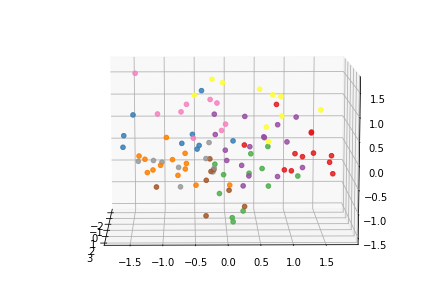

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    ax.scatter(df1['x'], df1['y'], df1['z'], marker='o', s=20, c=df1['cluster'], cmap=plt.get_cmap('Set1'), alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

anim.save('clusters_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
pwd!

'/content/drive/.shortcut-targets-by-id/1CfoPpKeE2R64dSD490FJpAazyVsFF3qX/TFM . Id Estilos de Jog/Datasets'